In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("nhanes_cardiometabolic_subset_dataset.csv")

print("Rows, Columns:", df.shape)
display(df.head())
df.info()

Rows, Columns: (10175, 64)


,SEQN,BPXSY1,BPXSY2,BPXSY3,BPXSY4,BPXDI1,BPXDI2,BPXDI3,BPXDI4,BPXPULS,...,PAQ605,PAQ620,PAD615,PAQ650,DBQ010,DBQ700,SLQ050,SLQ060,HSD010,BPQ080
0,73557,122.0,114.0,102.0,NaN,72.0,76.0,74.0,NaN,1.0,...,2.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,2.0,1.0
1,73558,156.0,160.0,156.0,NaN,62.0,80.0,42.0,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,3.0,2.0,2.0,4.0,1.0
2,73559,140.0,140.0,146.0,NaN,90.0,76.0,80.0,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,3.0,2.0,2.0,3.0,1.0
3,73560,108.0,102.0,104.0,NaN,38.0,34.0,38.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,136.0,134.0,142.0,NaN,86.0,88.0,86.0,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,2.0,2.0,2.0,5.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQN               10175 non-null  int64  
 1   BPXSY1             7172 non-null   float64
 2   BPXSY2             7409 non-null   float64
 3   BPXSY3             7408 non-null   float64
 4   BPXSY4             515 non-null    float64
 5   BPXDI1             7172 non-null   float64
 6   BPXDI2             7409 non-null   float64
 7   BPXDI3             7408 non-null   float64
 8   BPXDI4             515 non-null    float64
 9   BPXPULS            9511 non-null   float64
 10  BPXSY_AVG          7531 non-null   float64
 11  BPXDI_AVG          7531 non-null   float64
 12  BP_CATEGORY        7531 non-null   object 
 13  HTN_STAGE          7531 non-null   object 
 14  HYPERTENSION_YN    10175 non-null  int64  
 15  BPQ020             6464 non-null   float64
 16  BPQ030             217

In [13]:
data_dict = pd.DataFrame(index=df.columns)

data_dict["Data_Type"] = df.dtypes.astype(str)
data_dict["Non_Null_Count"] = df.notnull().sum()
data_dict["Missing_Count"] = df.isnull().sum()
data_dict["Percent_Missing"] = (df.isnull().sum() / len(df) * 100).round(2)
data_dict["Min"] = df.min(numeric_only=True)
data_dict["Max"] = df.max(numeric_only=True)

data_dict.reset_index(inplace=True)
data_dict.rename(columns={"index": "Column"}, inplace=True)

display(data_dict)

,Column,Data_Type,Non_Null_Count,Missing_Count,Percent_Missing,Min,Max
0,SEQN,int64,10175,0,0.00,73557.0,83731.0
1,BPXSY1,float64,7172,3003,29.51,66.0,228.0
2,BPXSY2,float64,7409,2766,27.18,66.0,230.0
3,BPXSY3,float64,7408,2767,27.19,62.0,228.0
4,BPXSY4,float64,515,9660,94.94,80.0,212.0
...,...,...,...,...,...,...,...
59,DBQ700,float64,6464,3711,36.47,1.0,9.0
60,SLQ050,float64,6464,3711,36.47,1.0,9.0
61,SLQ060,float64,6464,3711,36.47,1.0,9.0
62,HSD010,float64,6467,3708,36.44,1.0,9.0


In [41]:
(df.isnull().mean()*100).sort_values(ascending=False).head(15)

BPXSY4          94.938575
BPXDI4          94.938575
PAD615          88.520885
DIQ070          88.206388
BPQ050A         82.162162
DBQ010          81.670762
BPQ030          78.633907
SMQ040          74.653563
ACR_MG_PER_G    73.562654
URXUCR          73.562654
LBXIN           69.601966
LBDLDL          69.484029
RATIO_TG_HDL    69.081081
LBXTR           69.081081
ALQ120U         64.687961
dtype: float64

In [7]:
data_dict.to_csv("data_dictionary_numeric_summary.csv", index=False)

In [15]:
summary_stats = df.describe().T
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
SEQN,10175.0,78644.000000,2937.413829,73557.0,76100.5,78644.0,81187.5,83731.0
BPXSY1,7172.0,118.123536,18.078149,66.0,106.0,116.0,128.0,228.0
BPXSY2,7409.0,118.230530,18.181197,66.0,106.0,116.0,128.0,230.0
BPXSY3,7408.0,117.999460,18.079852,62.0,106.0,114.0,128.0,228.0
BPXSY4,515.0,125.666019,22.608087,80.0,108.0,126.0,140.0,212.0
...,...,...,...,...,...,...,...,...
DBQ700,6464.0,2.958230,0.995792,1.0,2.0,3.0,4.0,9.0
SLQ050,6464.0,1.757426,0.448430,1.0,2.0,2.0,2.0,9.0
SLQ060,6464.0,1.924505,0.427139,1.0,2.0,2.0,2.0,9.0
HSD010,6467.0,2.768053,0.970974,1.0,2.0,3.0,3.0,9.0


In [15]:
summary_stats.to_csv("summary_statistics_numeric.csv")

In [51]:
df[num_cols].var().sort_values().head(10)

BPXPULS            0.013483
DIQ050             0.034695
LBXSAL             0.118095
DIQ010             0.119284
PAQ605             0.140825
BPQ050A            0.144054
SLQ060             0.182448
SLQ050             0.201090
HYPERTENSION_YN    0.210315
PAQ650             0.212545
dtype: float64

In [17]:
corr_matrix = df.corr(numeric_only=True)

display(corr_matrix.head())

,SEQN,BPXSY1,BPXSY2,BPXSY3,BPXSY4,BPXDI1,BPXDI2,BPXDI3,BPXDI4,BPXPULS,...,PAQ605,PAQ620,PAD615,PAQ650,DBQ010,DBQ700,SLQ050,SLQ060,HSD010,BPQ080
SEQN,1.000000,-0.006942,-0.012162,-0.007824,-0.007601,-0.002622,-0.007373,0.000713,-0.012373,-0.004178,...,-0.011121,-0.002239,0.002118,0.004034,0.01505,0.000753,0.008982,0.016949,-0.008656,-0.016221
BPXSY1,-0.006942,1.000000,0.955778,0.947584,0.926341,0.432448,0.386302,0.362371,0.199261,0.065753,...,-0.021399,0.034493,-0.019907,0.213605,NaN,-0.003487,-0.067408,-0.032878,0.174155,-0.071553
BPXSY2,-0.012162,0.955778,1.000000,0.957972,0.937313,0.446678,0.403071,0.379214,0.304107,0.068248,...,-0.020525,0.032888,-0.002829,0.208167,NaN,0.013070,-0.065578,-0.036937,0.181991,-0.075654
BPXSY3,-0.007824,0.947584,0.957972,1.000000,0.959501,0.446830,0.403238,0.384289,0.288207,0.071749,...,-0.024219,0.028726,-0.010281,0.208495,NaN,0.015005,-0.058971,-0.029706,0.182179,-0.066581
BPXSY4,-0.007601,0.926341,0.937313,0.959501,1.000000,0.363455,0.374406,0.361727,0.330241,0.070221,...,-0.034060,-0.016553,0.012967,0.251673,NaN,-0.021094,-0.034840,-0.054843,0.138800,-0.088767


In [21]:
corr_matrix.to_csv("correlation_matrix.csv")

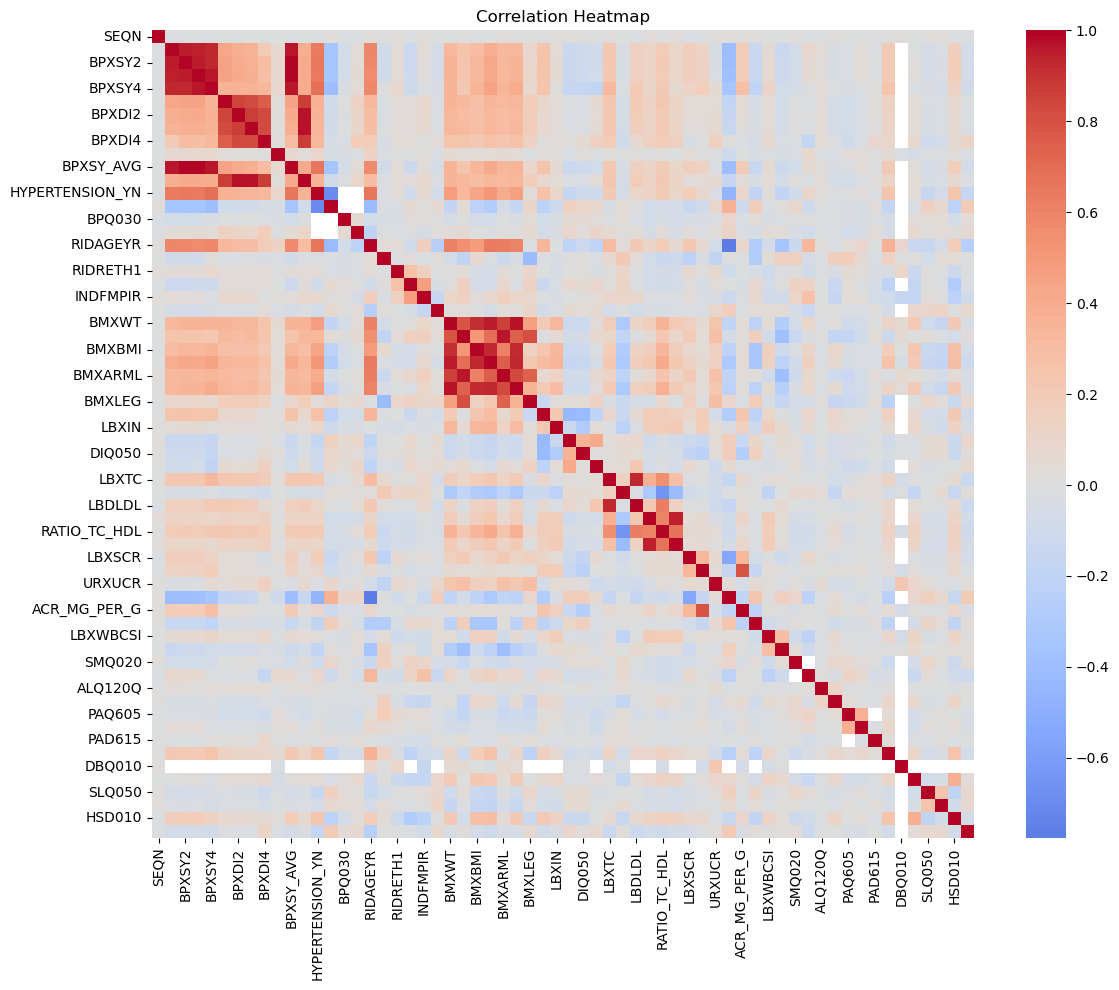

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

In [45]:
df.corr(numeric_only=True)["HYPERTENSION_YN"].sort_values(ascending=False)

HYPERTENSION_YN      1.000000
BPXSY4               0.684953
RIDAGEYR             0.655671
BPXSY_AVG            0.654279
BPXSY2               0.651378
                       ...   
eGFR_CKD_EPI_2021   -0.462391
BPQ020              -0.697522
BPQ030                    NaN
BPQ050A                   NaN
DBQ010                    NaN
Name: HYPERTENSION_YN, Length: 62, dtype: float64

In [21]:
categorical_cols = df.select_dtypes(include=["object", "int64"]).columns
print(categorical_cols)

Index(['SEQN', 'BP_CATEGORY', 'HTN_STAGE', 'HYPERTENSION_YN', 'RIDAGEYR',
       'RIAGENDR', 'RIDRETH1'],
      dtype='object')


In [23]:
freq_tables = {}

for col in categorical_cols:
    freq_tables[col] = df[col].value_counts(dropna=False)
    print(f"\n===== {col} =====")
    print(freq_tables[col])


===== SEQN =====
SEQN
73557    1
80343    1
80336    1
80337    1
80338    1
        ..
76949    1
76950    1
76951    1
76952    1
83731    1
Name: count, Length: 10175, dtype: int64

===== BP_CATEGORY =====
BP_CATEGORY
Normal      4510
NaN         2644
Stage1      1344
Elevated     995
Stage2       682
Name: count, dtype: int64

===== HTN_STAGE =====
HTN_STAGE
Normal      4510
NaN         2644
Stage1      1344
Elevated     995
Stage2       682
Name: count, dtype: int64

===== HYPERTENSION_YN =====
HYPERTENSION_YN
0    7115
1    3060
Name: count, dtype: int64

===== RIDAGEYR =====
RIDAGEYR
0     405
80    352
2     278
6     262
1     262
     ... 
75     51
76     51
77     38
78     36
79     30
Name: count, Length: 81, dtype: int64

===== RIAGENDR =====
RIAGENDR
2    5172
1    5003
Name: count, dtype: int64

===== RIDRETH1 =====
RIDRETH1
3    3674
4    2267
1    1730
5    1544
2     960
Name: count, dtype: int64


In [33]:
for col, table in freq_tables.items():
    table.to_csv(f"freq_{col}.csv")

In [37]:
for col in categorical_cols:
    percent_table = df[col].value_counts(normalize=True, dropna=False) * 100
    percent_table.to_csv(f"freq_percent_{col}.csv")

In [55]:
df["HYPERTENSION_YN"].value_counts(normalize=True)*100

HYPERTENSION_YN
0    69.92629
1    30.07371
Name: proportion, dtype: float64

In [39]:
pd.crosstab(df["HYPERTENSION_YN"], df["RIAGENDR"], normalize="index") * 100

RIAGENDR,1,2
HYPERTENSION_YN,,
0,48.643710,51.356290
1,50.392157,49.607843


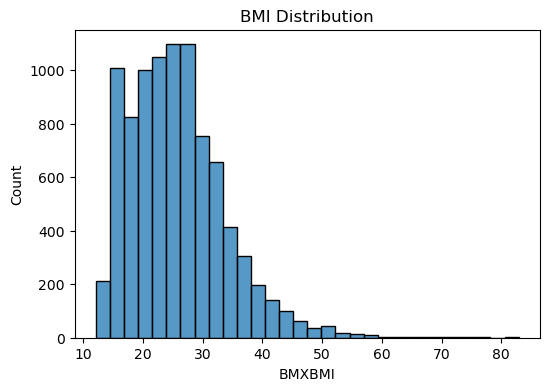

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df["BMXBMI"].dropna(), bins=30)
plt.title("BMI Distribution")
plt.savefig("bmi_distribution.png")
plt.show()

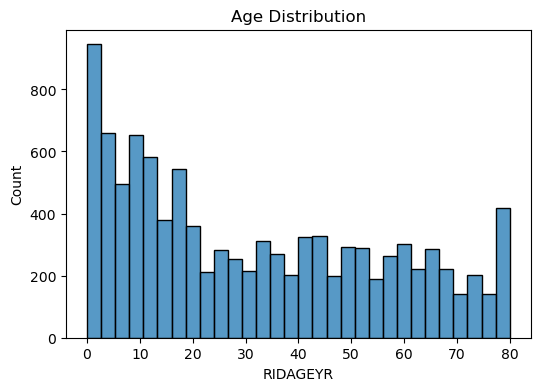

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df["RIDAGEYR"].dropna(), bins=30)
plt.title("Age Distribution")
plt.savefig("age_distribution.png")
plt.show()

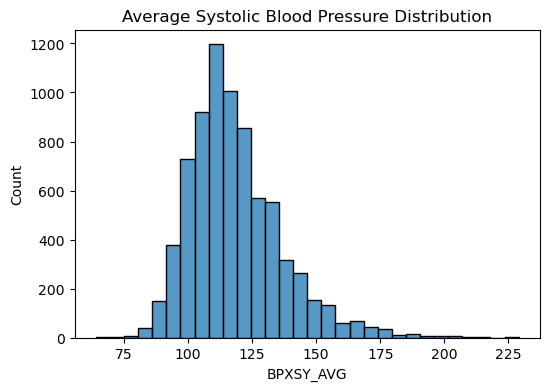

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df["BPXSY_AVG"].dropna(), bins=30)
plt.title("Average Systolic Blood Pressure Distribution")
plt.savefig("bp_distribution.png")
plt.show()

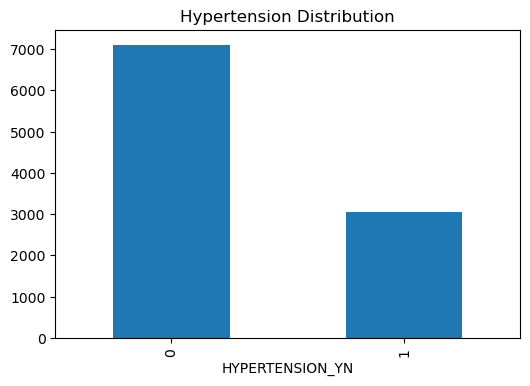

In [29]:
plt.figure(figsize=(6,4))
df["HYPERTENSION_YN"].value_counts().plot(kind="bar")
plt.title("Hypertension Distribution")
plt.savefig("hypertension_bar.png")
plt.show()

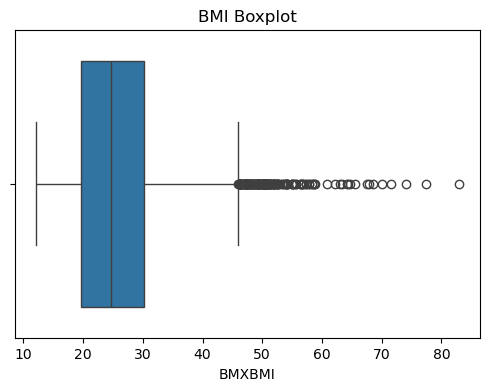

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["BMXBMI"])
plt.title("BMI Boxplot")
plt.savefig("bmi_boxplot.png")
plt.show()

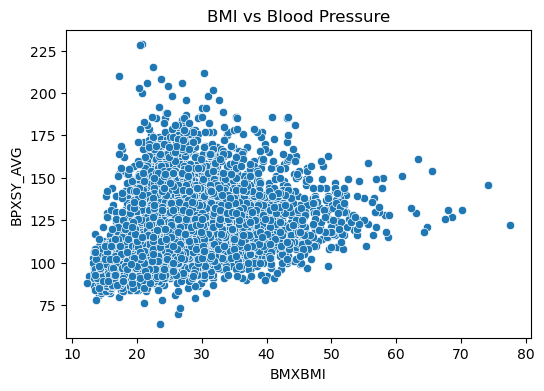

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["BMXBMI"], y=df["BPXSY_AVG"])
plt.title("BMI vs Blood Pressure")
plt.savefig("bmi_vs_bp.png")
plt.show()

<Axes: xlabel='BMXBMI', ylabel='BPXSY_AVG'>

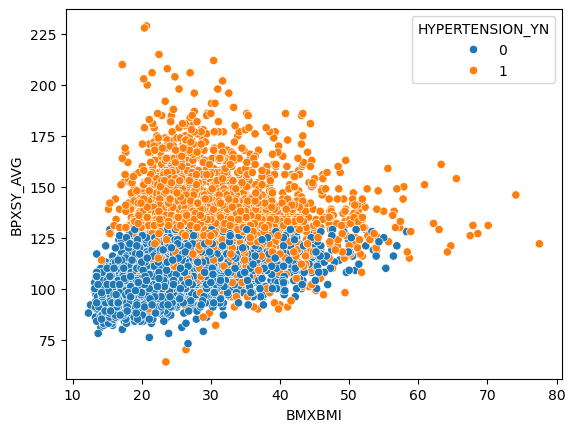

In [43]:
sns.scatterplot(x="BMXBMI", y="BPXSY_AVG", hue="HYPERTENSION_YN", data=df)

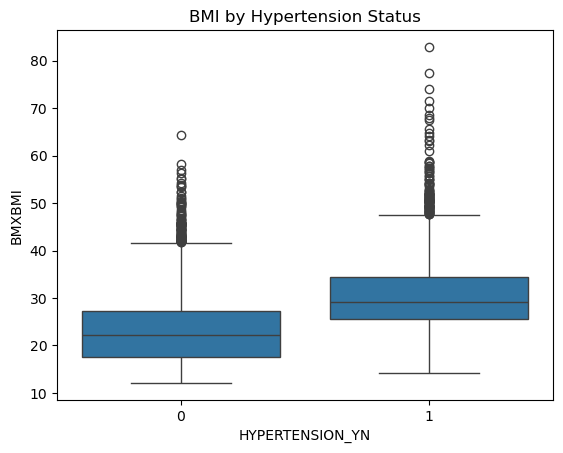

In [35]:
sns.boxplot(x="HYPERTENSION_YN", y="BMXBMI", data=df)
plt.title("BMI by Hypertension Status")
plt.show()

In [59]:
df["BMI_Q"] = pd.qcut(df["BMXBMI"], 4)

pd.crosstab(df["BMI_Q"], df["HYPERTENSION_YN"], normalize="index")*100

HYPERTENSION_YN,0,1
BMI_Q,,
"(12.099, 19.7]",96.265378,3.734622
"(19.7, 24.7]",76.441881,23.558119
"(24.7, 30.2]",55.847569,44.152431
"(30.2, 82.9]",40.677966,59.322034
